# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [32]:
import pandas as pd
colnames = ["age", "operation_year", "nodes_detected", "survival_status"]
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names=colnames, header=None)
print(df.head())
print(len(df))

   age  operation_year  nodes_detected  survival_status
0   30              64               1                1
1   30              62               3                1
2   30              65               0                1
3   31              59               2                1
4   31              65               4                1
306


In [33]:
#306 instances, same as listed in documentation
#http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival
df['survival_status']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      2
8      2
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    2
282    1
283    1
284    1
285    2
286    2
287    1
288    1
289    1
290    1
291    1
292    1
293    2
294    1
295    1
296    1
297    1
298    1
299    2
300    1
301    1
302    1
303    1
304    2
305    2
Name: survival_status, Length: 306, dtype: int64

In [34]:
df.isna().sum()

age                0
operation_year     0
nodes_detected     0
survival_status    0
dtype: int64

In [35]:
#no NaN
list(df)

['age', 'operation_year', 'nodes_detected', 'survival_status']

In [36]:
# >>> df = pd.DataFrame({'col2': {0: 'a', 1: 2, 2: np.nan}, 'col1': {0: 'w', 1: 1, 2: 2}})
# >>> di = {1: "A", 2: "B"}
# >>> df
#   col1 col2
# 0    w    a
# 1    1    2
# 2    2  NaN
# >>> df.replace({"col1": di})
#   col1 col2
# 0    w    a
# 1    A    2
# 2    B  NaN
#The survival variable is encoded as 1 for surviving >5 years and 2 for not - 
#change this to be 0 for not surviving and 1 for surviving >5 years 
#(0/1 is a more traditional encoding of binary variables)

survival_update = {1:1, 2:0}
df_1 = df
df_1['survival_status'] = df['survival_status'].map(survival_update)
print(list(df_1))
#df_1['survival_status']
df['survival_status']


['age', 'operation_year', 'nodes_detected', 'survival_status']


0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    0
282    1
283    1
284    1
285    0
286    0
287    1
288    1
289    1
290    1
291    1
292    1
293    0
294    1
295    1
296    1
297    1
298    1
299    0
300    1
301    1
302    1
303    1
304    0
305    0
Name: survival_status, Length: 306, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.



# ***The Really Cool Stuff Happens At The Very End of This Section***

In [37]:
df_1.describe()

,age,operation_year,nodes_detected,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [56]:
#General note, it appears that most patients survive
ct1 = pd.crosstab(df_1.operation_year, df_1.survival_status, normalize='index')
print(ct1)

survival_status         0         1
operation_year                     
58               0.333333  0.666667
59               0.333333  0.666667
60               0.142857  0.857143
61               0.115385  0.884615
62               0.304348  0.695652
63               0.266667  0.733333
64               0.258065  0.741935
65               0.464286  0.535714
66               0.214286  0.785714
67               0.160000  0.840000
68               0.230769  0.769231
69               0.363636  0.636364


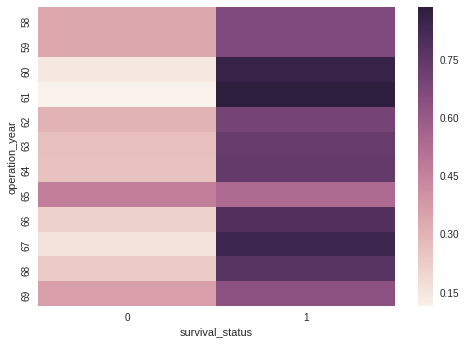

In [57]:
import seaborn as sns
sns.heatmap(ct1)

In [61]:
ct2 = pd.crosstab(df_1.nodes_detected, df_1.survival_status, normalize='index')
print(ct2)

survival_status         0         1
nodes_detected                     
0                0.139706  0.860294
1                0.195122  0.804878
2                0.250000  0.750000
3                0.350000  0.650000
4                0.230769  0.769231
5                0.666667  0.333333
6                0.428571  0.571429
7                0.285714  0.714286
8                0.285714  0.714286
9                0.666667  0.333333
10               0.333333  0.666667
11               0.750000  0.250000
12               0.500000  0.500000
13               0.800000  0.200000
14               0.250000  0.750000
15               0.666667  0.333333
16               0.000000  1.000000
17               1.000000  0.000000
18               0.000000  1.000000
19               0.666667  0.333333
20               0.500000  0.500000
21               1.000000  0.000000
22               0.333333  0.666667
23               1.000000  0.000000
24               1.000000  0.000000
25               0.000000  1

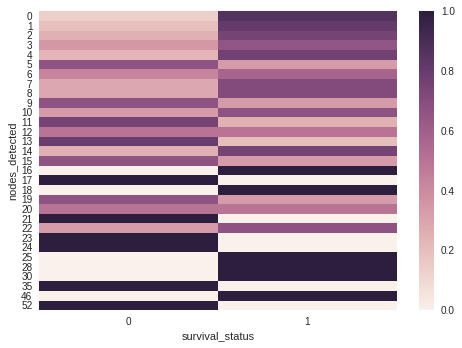

In [58]:
sns.heatmap(ct2)

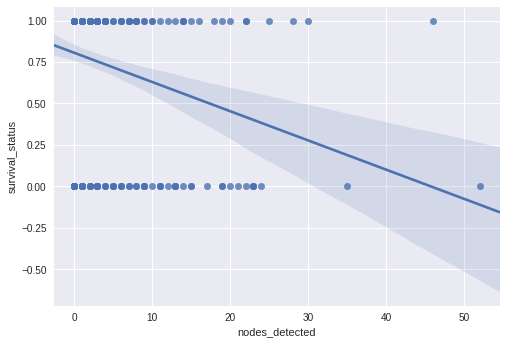

In [59]:
sns.regplot(df_1.nodes_detected, df_1.survival_status)

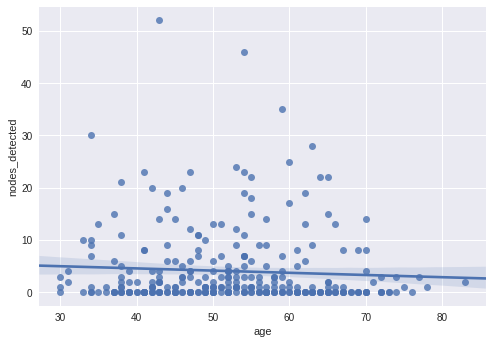

In [60]:
sns.regplot(df_1.age, df_1.nodes_detected)

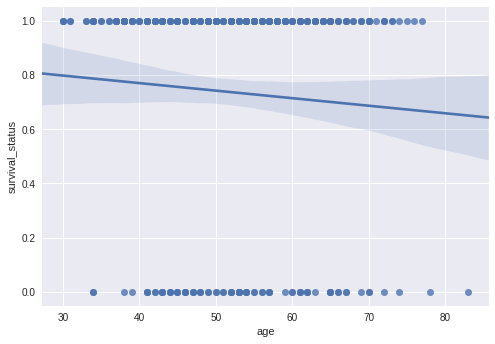

In [62]:
sns.regplot(df_1.age, df_1.survival_status)

In [0]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(30, 90, 10)]
df_1['age_group'] = pd.cut(df_1.age, range(30,100,10), right=False, labels=labels)
print(labels)
df_1['age_group']

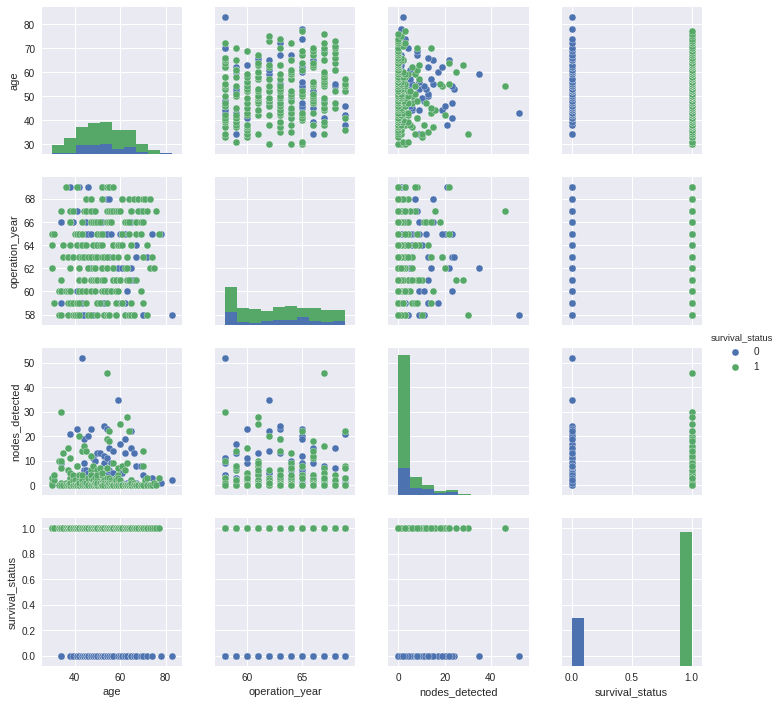

In [107]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 50, 10)]
df_1['node_group'] = pd.cut(df_1.nodes_detected, range(0,60,10), right=False, labels=labels)
sns.pairplot(df_1, hue='survival_status')
#df_1['node_group']

In [111]:
df_by_age_group = df_1.groupby('age_group')
df_by_age_group.describe()

age                                                     \
          count       mean       std   min   25%   50%   75%   max   
age_group                                                            
30 - 39    40.0  35.850000  2.796976  30.0  34.0  37.0  38.0  39.0   
40 - 49    84.0  44.750000  2.767605  40.0  42.0  45.0  47.0  49.0   
50 - 59    99.0  54.202020  2.781058  50.0  52.0  54.0  57.0  59.0   
60 - 69    62.0  63.887097  2.649496  60.0  62.0  64.0  66.0  69.0   
70 - 79    20.0  72.450000  2.523052  70.0  70.0  72.0  74.0  78.0   
80 - 89     1.0  83.000000       NaN  83.0  83.0  83.0  83.0  83.0   

          nodes_detected           ...  operation_year       survival_status  \
                   count      mean ...             75%   max           count   
age_group                          ...                                         
30 - 39             40.0  4.050000 ...            65.0  69.0            40.0   
40 - 49             84.0  4.321429 ...            65.0  69.0            84.0   
50 - 59             99.0  4.404040 ...            65.0  69.0            99.0   
60 - 69             62.0  3.709677 ...            66.0  68.0            62.0   
70 - 79             20.0  1.950000 ...            67.0  68.0            20.0   
80 - 89              1.0  2.000000 ...            58.0  58.0             1.0   

                                                         
               mean       std  min   25%  50%  75%  max  
age_group                                                
30 - 39    0.900000  0.303822  0.0  1.00  1.0  1.0  1.0  
40 - 49    0.678571  0.469830  0.0  0.00  1.0  1.0  1.0  
50 - 59    0.737374  0.442301  0.0  0.00  1.0  1.0  1.0  
60 - 69    0.709677  0.457617  0.0  0.00  1.0  1.0  1.0  
70 - 79    0.750000  0.444262  0.0  0.75  1.0  1.0  1.0  
80 - 89    0.000000       NaN  0.0  0.00  0.0  0.0  0.0  

[6 rows x 32 columns]

In [116]:
dfbag_mean = df_by_age_group.mean()
print(df_by_age_group.mean())

                 age  operation_year  nodes_detected  survival_status
age_group                                                            
30 - 39    35.850000       62.300000        4.050000         0.900000
40 - 49    44.750000       62.833333        4.321429         0.678571
50 - 59    54.202020       62.898990        4.404040         0.737374
60 - 69    63.887097       62.935484        3.709677         0.709677
70 - 79    72.450000       63.800000        1.950000         0.750000
80 - 89    83.000000       58.000000        2.000000         0.000000


Text(0,0.5,'Percent Likelihood of Survival After 5 Years')

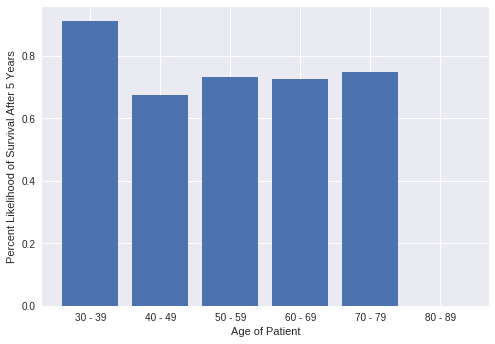

In [90]:
import matplotlib.pyplot as plt
plt.bar(dfbag_mean.index, dfbag_mean.survival_status)
plt.xlabel('Age of Patient')
plt.ylabel('Percent Likelihood of Survival After 5 Years')

age_group    30 - 39   40 - 49   50 - 59   60 - 69   70 - 79  80 - 89
node_group                                                           
0 - 9       0.909091  0.732394  0.802326  0.773585  0.736842      0.0
10 - 19     1.000000  0.500000  0.250000  0.000000  1.000000      NaN
20 - 29     0.000000  0.250000  0.333333  0.750000       NaN      NaN
30 - 39     1.000000       NaN  0.000000       NaN       NaN      NaN
40 - 49          NaN       NaN  1.000000       NaN       NaN      NaN


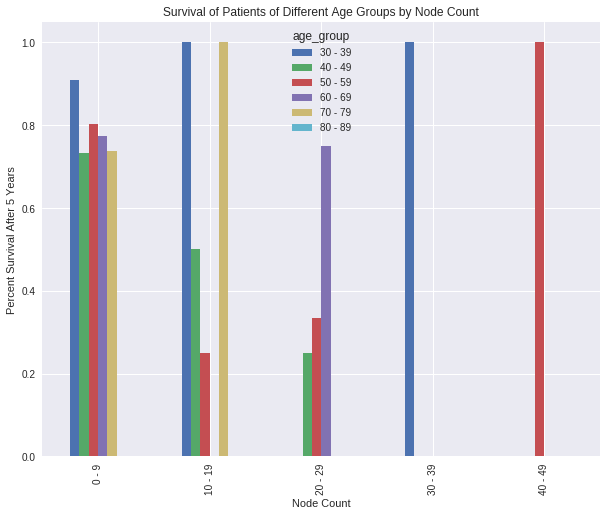

In [138]:
testing = df_1.groupby(['node_group','age_group'])['survival_status'].aggregate('mean').unstack()
ax = testing.plot.bar(title='Survival of Patients of Different Age Groups by Node Count', figsize=(10,8))
ax.set_xlabel('Node Count')
ax.set_ylabel('Percent Survival After 5 Years')
print(testing)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1) 'What is at least one feature that looks to have a positive correlation with survival?'
---
Youth appears to correlate with survival status.


2) 'What is at least one feature that looks to have a negative correlation with survival?'
---
Number of nodes correlates negatively with survival status.

3) How are those two features related with each other, and what might that mean?
---
Interstingly, number of nodes is negatively correlated with age, but this may just be some sort of survivor bias. Those with more nodes are dead before they have time to become old. 